In [1]:
from utils import *

import pandas as pd


In [2]:
x = np.random.random_integers(0,100,3).reshape(1,-1)
y = np.random.random_integers(0,100,3).reshape(1,-1)
z = np.random.random_integers(0,100,3).reshape(1,-1)

x = normalize(x)
y = normalize(y)
z = normalize(z)


C:\Users\Mark Risk\AppData\Local\Temp\ipykernel_20796\500828526.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  x = np.random.random_integers(0,100,3).reshape(1,-1)
C:\Users\Mark Risk\AppData\Local\Temp\ipykernel_20796\500828526.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  y = np.random.random_integers(0,100,3).reshape(1,-1)
C:\Users\Mark Risk\AppData\Local\Temp\ipykernel_20796\500828526.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  z = np.random.random_integers(0,100,3).reshape(1,-1)


In [3]:
print(x)
print(y)

[[0.1169676  0.67674109 0.72687006]]
[[0.96435326 0.24468665 0.10075333]]


In [4]:
l = 1.3834239
k1 = Matern(length_scale=l, nu = 0.5)
k2 = NTK(depth = 25, c = 2.0, bias = 0)
print(k1(x,y))
print(k2(x,y))

[[0.43905079]]
[[0.31618445]]


In [48]:
from numpy import float128

ImportError: cannot import name 'float128' from 'numpy' (C:\anaconda3\envs\thesis\lib\site-packages\numpy\__init__.py)

# Important

<AxesSubplot:xlabel='log_bias'>

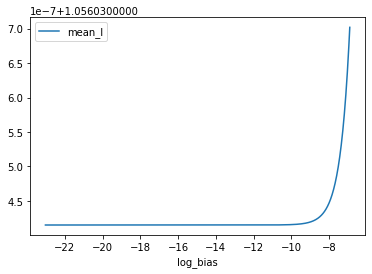

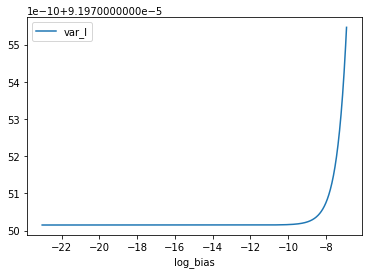

In [113]:
D = 6
nn = 3
d = 100

biases = []
means = []
vars = []

for b in np.linspace(-10,-3,1000):
    bias = 10.0**b
    #bias = b
    biases.append(bias)
    k2 = NTK(depth = D, c = 2.0, bias = bias)
    # print(f"bias = {bias}")

    lengthscales = np.zeros([nn])
    np.random.seed(2)
    for i in range(0,nn):
        x2 = np.random.randint(0,100,d).reshape(1,-1)
        y2 = np.random.randint(0,100,d).reshape(1,-1)

        x2 = normalize(x2)
        y2 = normalize(y2)

        K = k2(x2,y2)
        lengthscales[i] = - np.linalg.norm(x2-y2) / np.log(k2(x2,y2))
    mean = np.mean(lengthscales)
    var = np.var(lengthscales)
    # print(f"mean(lengthscales) = {mean}")
    # print(f"var(lengthscales) = {var}")
    means.append(mean)
    vars.append(var)


d = {'bias': biases,
        'mean_l': means,
        'var_l': vars}

df = pd.DataFrame(data=d)

df['log_bias'] = np.log(df.bias)

df.plot(x='log_bias',y='mean_l')
df.plot(x='log_bias',y='var_l')

#df.plot(x='bias',y='mean_l')
#df.plot(x='bias',y='var_l')


## Sorts by variances

In [ ]:
df.sort_values('var_l')

# Old

In [22]:
# "d" doesn't matter (here is S^{49})

k1 = Matern(length_scale=2.07, nu=0.5)
k2 = NTK(depth = 3, c = 2.0, bias = 2.3)


x2 = np.random.randint(0,100,50).reshape(1,-1)
y2 = np.random.randint(0,100,50).reshape(1,-1)

x2 = normalize(x2)
y2 = normalize(y2)

print(k1(x2,y2))
print(k2(x2,y2))

[[0.70552415]]
[[0.7046552]]


In [11]:
k2 = NTK(depth = 3, c = 2.0, bias = 0.0)

x = np.array([1,0,0]).reshape(1,-1)
y = np.array([0,1,0]).reshape(1,-1)

k2(x,x)

array([[0.99999998]])